# Football Players Rating Project

Hello, this my project for the data mining in which I am going to work on a dataset from kaggle with players stats and ratings during different matches in different championships. During this project, I am going to clean, analyse, create features and predict the rating.
I hope you enjoy it.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I'll start by importing the dataset of football players stats and ratings.

In [8]:
train = pd.read_csv('FootballPlayersRating.csv')

In [9]:
train.shape

(22555, 47)

<AxesSubplot:xlabel='rating', ylabel='count'>

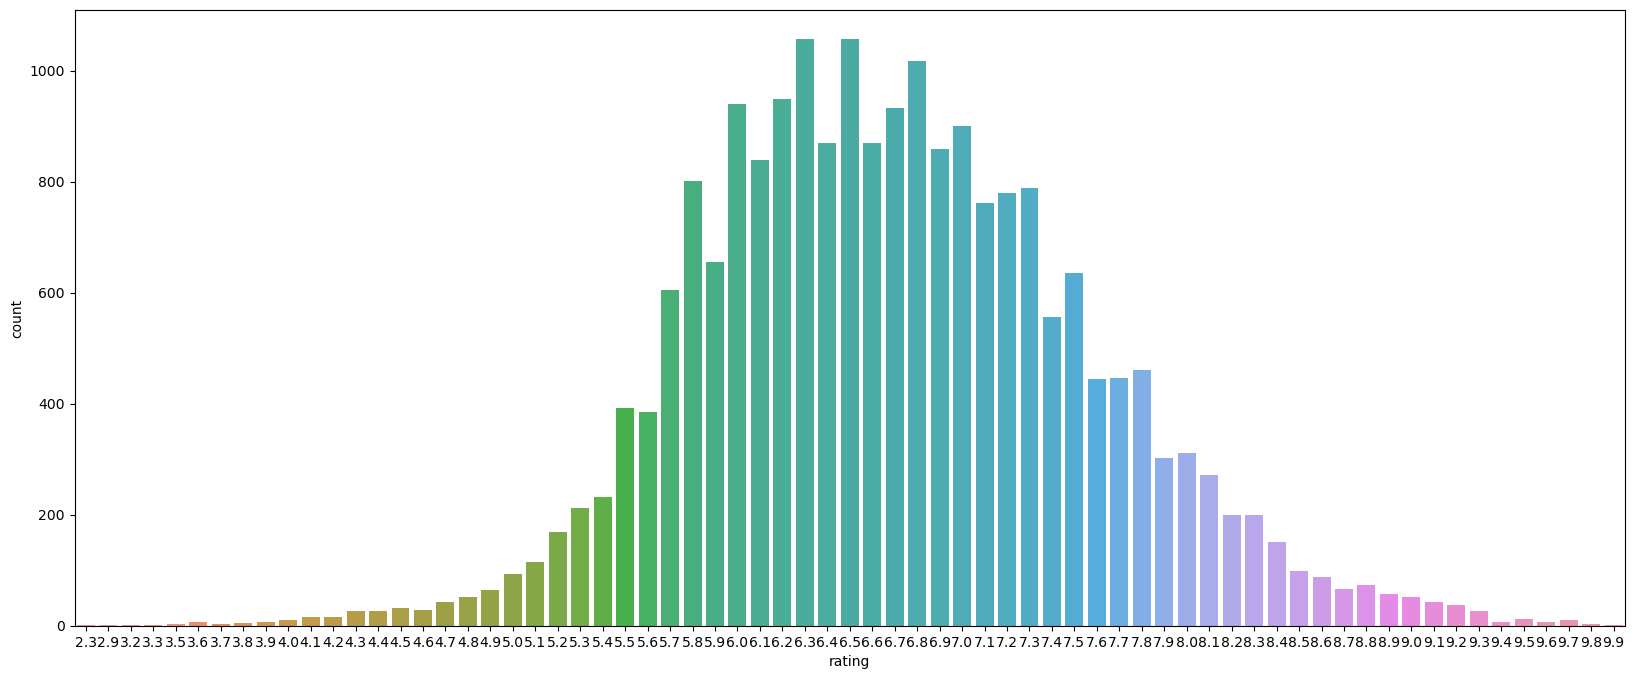

In [10]:
plt.figure(figsize=(20,8))
rating_df = train[['rating']].dropna()
roles_df = rating_df.groupby('rating').rating.agg('count').to_frame('count').reset_index()
sns.barplot(x='rating', y='count', data=roles_df)

Here, we can see that the ratings are normally distribueted between 3 and 9 since it's hard to get the 10.

<AxesSubplot:>

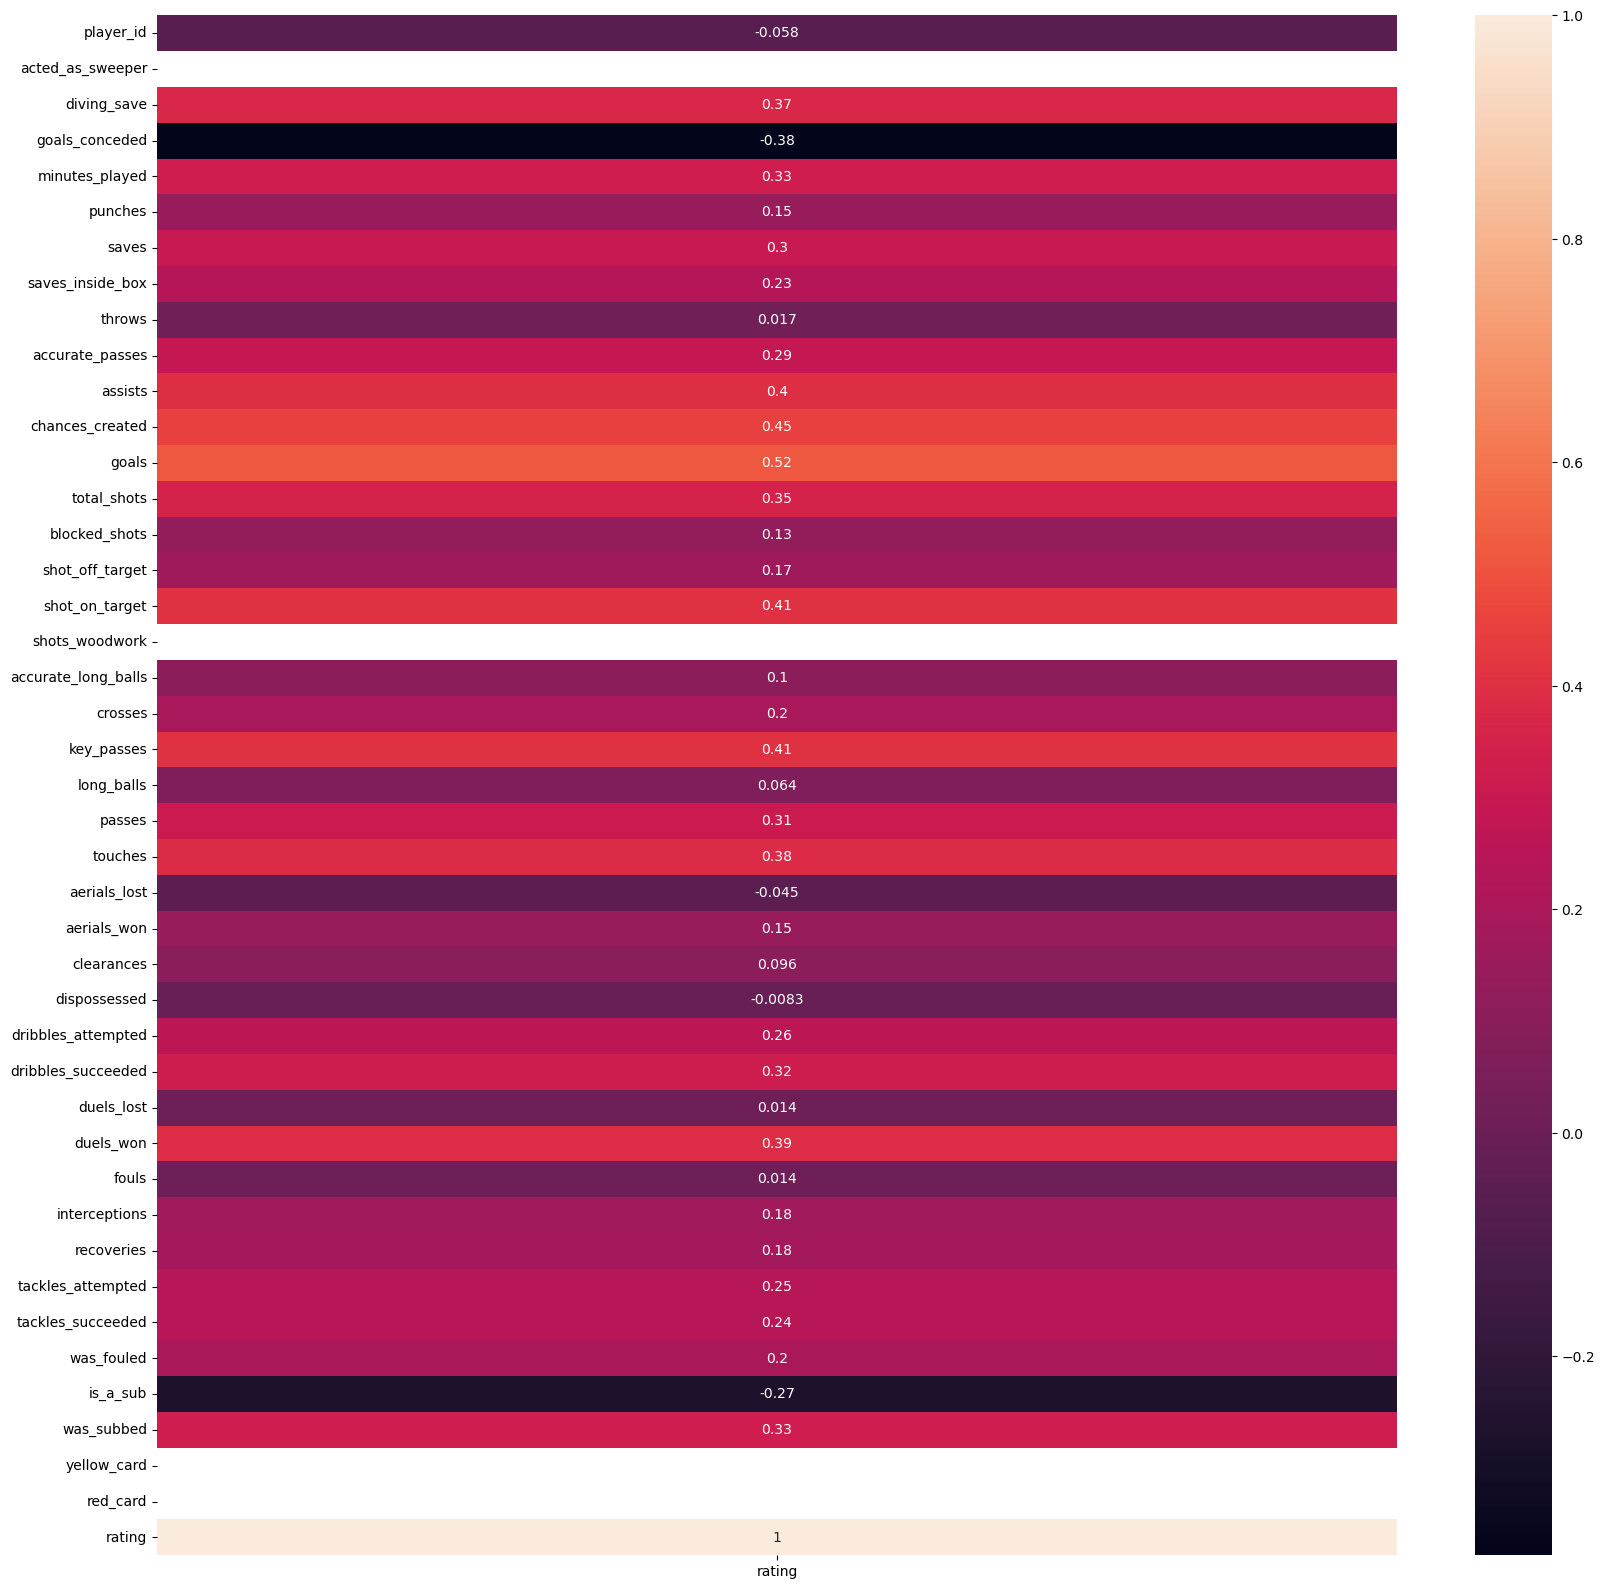

In [11]:
plt.figure(figsize=(20,20))

sns.heatmap(train.corr()[['rating']], annot=True)

I tried to visualize the correlation between our label (target feature thet we want our model to predict later) and the others features of our dataset to have an idea of which features have more influence on the rating, and those who don't influence it at all, that's important to know which columns we must focus on the most. The features that have a correlation > 0.35 can be considered as important columns such as saves, assists, goals ... Columns like player_id have values close to 0 so have no impact on the rating.

<AxesSubplot:xlabel='role', ylabel='count'>

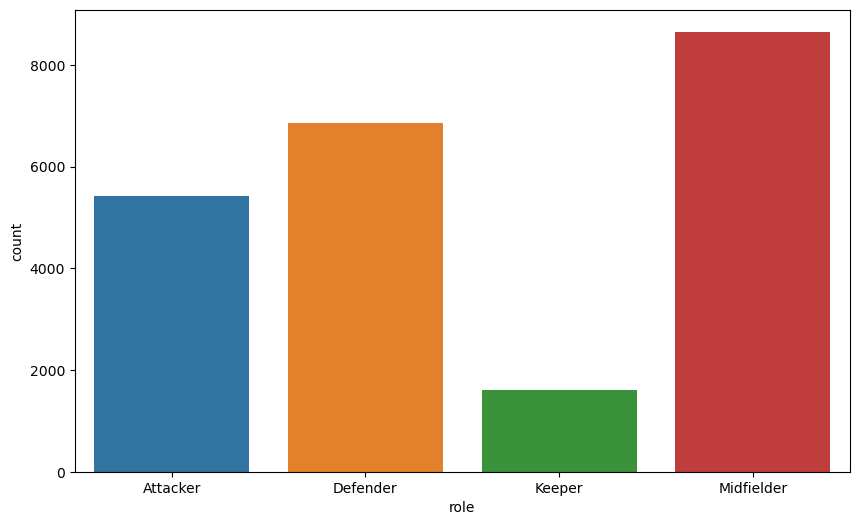

In [12]:
plt.figure(figsize=(10, 6))
roles_df = train.groupby(['role']).role.agg('count').to_frame('count').reset_index()
sns.barplot(x='role', y='count', data=roles_df)

Here I tried how the players in the dataset are distribueted based on the roles (roles column have 4 unique values; keeper, defender, midfielder or attacker) and as we can see the keepers are the least since each team has only 1 keeper per game and it's rare to substitute a keeper, that's why we're going to split the data later to have 2 dataframes; 1 for the keepers and keep the columns that are unique for the keeper like saves and diving_saves... and a dataframe for the players with their columns that are unique for the players and not the keepers.

Looking for the null values in the dataset.

In [13]:
null_values_dict = train.isnull().sum().to_dict()
for key, value in null_values_dict.items():
    if value == 0:
        continue
    else:
        print(key," : ", value)

role  :  6
acted_as_sweeper  :  20940
diving_save  :  20940
goals_conceded  :  20940
punches  :  20940
saves  :  20940
saves_inside_box  :  20940
throws  :  20940
assists  :  1615
chances_created  :  1615
goals  :  1615
pass_success  :  1615
was_subbed  :  12685
yellow_card  :  19280
red_card  :  22491
rating  :  1366


In [14]:
train.describe()

,player_id,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,...,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
count,2.255500e+04,1615.0,1615.000000,1615.000000,22555.000000,1615.000000,1615.000000,1615.000000,1615.000000,22555.000000,...,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,9870.000000,3275.0,64.0,21189.000000
mean,3.757534e+05,0.0,1.426625,0.317028,70.245666,0.305263,2.716409,1.665635,4.220433,26.387763,...,0.742186,4.282155,1.112126,0.661583,0.847395,0.218932,0.501114,1.0,1.0,6.696739
std,2.648706e+05,0.0,1.353561,1.002995,29.499013,0.589302,1.918106,1.449574,2.429875,20.309901,...,1.080920,3.194726,1.365784,0.964334,1.112991,0.413531,0.500024,0.0,0.0,0.866871
min,2.805000e+03,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,2.300000
25%,1.665950e+05,0.0,0.000000,0.000000,57.000000,0.000000,1.000000,1.000000,2.000000,11.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,6.100000
50%,3.038000e+05,0.0,1.000000,0.000000,90.000000,0.000000,2.000000,1.000000,4.000000,22.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,6.700000
75%,5.819190e+05,0.0,2.000000,0.000000,90.000000,0.000000,4.000000,2.000000,6.000000,37.000000,...,1.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,7.300000
max,1.163226e+06,0.0,8.000000,9.000000,120.000000,4.000000,12.000000,8.000000,13.000000,178.000000,...,9.000000,23.000000,11.000000,8.000000,9.000000,1.000000,1.000000,1.0,1.0,9.900000


In [15]:
train['shots_woodwork'].head()

0    0
1    0
2    0
3    0
4    0
Name: shots_woodwork, dtype: int64

W're going to drop acted_as sweeper and shots_woodword since we have many missing values for the acted as sweeper column and for those who have decent football understanding this feature is pure tactical and don't really influence the rating of a player, and the other column is because of the false values, all values are zeros. That's not all there more columns that will be dropped later.

In [16]:
train = train.drop(['acted_as_sweeper', 'shots_woodwork'], axis=1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            22555 non-null  int64  
 1   name                 22555 non-null  object 
 2   role                 22549 non-null  object 
 3   diving_save          1615 non-null   float64
 4   goals_conceded       1615 non-null   float64
 5   minutes_played       22555 non-null  int64  
 6   punches              1615 non-null   float64
 7   saves                1615 non-null   float64
 8   saves_inside_box     1615 non-null   float64
 9   throws               1615 non-null   float64
 10  accurate_passes      22555 non-null  int64  
 11  assists              20940 non-null  float64
 12  chances_created      20940 non-null  float64
 13  goals                20940 non-null  float64
 14  pass_success         20940 non-null  object 
 15  total_shots          22555 non-null 

In [18]:
train.isna().sum()

player_id                  0
name                       0
role                       6
diving_save            20940
goals_conceded         20940
minutes_played             0
punches                20940
saves                  20940
saves_inside_box       20940
throws                 20940
accurate_passes            0
assists                 1615
chances_created         1615
goals                   1615
pass_success            1615
total_shots                0
blocked_shots              0
shot_accuracy              0
shot_off_target            0
shot_on_target             0
accurate_long_balls        0
crosses                    0
key_passes                 0
long_balls                 0
passes                     0
touches                    0
aerials_lost               0
aerials_won                0
clearances                 0
dispossessed               0
dribbles_attempted         0
dribbles_succeeded         0
duels_lost                 0
duels_won                  0
fouls         

There's many columns with a lot of missing values, some of them are useless, but some of them are important and we can easily fill them with accurate values.
Let's try and fill the pass_success column, as you may know this value is calculated by dividing the accurate_passes by the total passes which will give us a value between 0 and 1. Luckily, both accurate_passes and passes (which refers to the total passes) have no null values. So we can fill the pass_success column easily. And to make sure of the process I made this x dataframe to compare the pass_success with the result of dividing the accurate_passes by the total passes, and they're pretty the same.

In [19]:
x = pd.DataFrame()
x['calculated_value'] = train['accurate_passes'] / train['passes']
x['actual_values'] = train['pass_success']
x

,calculated_value,actual_values
0,0.777778,NaN
1,0.666667,67%
2,0.818182,82%
3,0.818182,NaN
4,0.600000,60%
...,...,...
22550,0.956522,96%
22551,0.840000,84%
22552,0.814815,81%
22553,0.666667,67%


Now that we're sure of our logic we can apply it on our train dataset.

In [20]:
train[train.pass_success.isnull()][['accurate_passes', 'passes', 'pass_success']]

,accurate_passes,passes,pass_success
0,14,18,NaN
3,9,11,NaN
17,17,29,NaN
29,11,21,NaN
42,13,31,NaN
...,...,...,...
22484,20,33,NaN
22498,11,31,NaN
22514,14,27,NaN
22528,22,27,NaN


To do so, we need to get the index of those missing values first and then apply the formula. We're going also to remove the % sign in both pass_sucess and shot_accuracy columns to use them later .

In [21]:
toFindPassAccIndexes = train[(train.pass_success == 0) & (train.passes>0)].index.values

train['pass_success'] = train['pass_success'].str.rstrip('%').astype('float') / 100.0
train['shot_accuracy'] = train['shot_accuracy'].str.rstrip('%').astype('float') / 100.0


for passAccIndex in toFindPassAccIndexes:
    if train.loc[passAccIndex, 'passes'] > 0:
        train.at[passAccIndex, 'pass_success'] = train.loc[passAccIndex, 'accurate_passes'] / train.loc[passAccIndex, 'passes']
    train['pass_success'] = train['pass_success'].fillna(0).astype(float)

In [22]:
train.columns

Index(['player_id', 'name', 'role', 'diving_save', 'goals_conceded',
       'minutes_played', 'punches', 'saves', 'saves_inside_box', 'throws',
       'accurate_passes', 'assists', 'chances_created', 'goals',
       'pass_success', 'total_shots', 'blocked_shots', 'shot_accuracy',
       'shot_off_target', 'shot_on_target', 'accurate_long_balls', 'crosses',
       'key_passes', 'long_balls', 'passes', 'touches', 'aerials_lost',
       'aerials_won', 'clearances', 'dispossessed', 'dribbles_attempted',
       'dribbles_succeeded', 'duels_lost', 'duels_won', 'fouls',
       'interceptions', 'recoveries', 'tackles_attempted', 'tackles_succeeded',
       'was_fouled', 'is_a_sub', 'was_subbed', 'yellow_card', 'red_card',
       'rating'],
      dtype='object')

In [23]:
train[['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created', 'goals', 'pass_success', 'was_subbed', 'yellow_card', 'red_card']] = train[['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created', 'goals', 'pass_success', 'was_subbed', 'yellow_card', 'red_card']].fillna(0)

Here I have just filled the missing values of some columns with zeros, it's not applicable on all columns but here it givesa good result, for example the missing values of saves, punches and diving_saves are for players who are NOT keepers so we can give them zeros, and missing values for columns like assists, goals and shot_on_target means the player is a keeper that's why we can fill them with zeros.

In [24]:
train.isna().sum()

player_id                 0
name                      0
role                      6
diving_save               0
goals_conceded            0
minutes_played            0
punches                   0
saves                     0
saves_inside_box          0
throws                    0
accurate_passes           0
assists                   0
chances_created           0
goals                     0
pass_success              0
total_shots               0
blocked_shots             0
shot_accuracy             0
shot_off_target           0
shot_on_target            0
accurate_long_balls       0
crosses                   0
key_passes                0
long_balls                0
passes                    0
touches                   0
aerials_lost              0
aerials_won               0
clearances                0
dispossessed              0
dribbles_attempted        0
dribbles_succeeded        0
duels_lost                0
duels_won                 0
fouls                     0
interceptions       

We have 6 players with missing values for the column role, we can drop them it won't really matter 6 rows won't really influence on a dataset of more than 22000 intances. But since it will be easy task I'll google them and fill their roles manually.

In [25]:
train[train['role'].isna()]

,player_id,name,role,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,...,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
11096,451941,Unai Garcia,NaN,0.0,0.0,18,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0.0,0.0,0.0,6.3
12088,451941,Unai Garcia,NaN,0.0,0.0,90,0.0,0.0,0.0,0.0,...,1,7,0,0,0,0,0.0,0.0,0.0,6.0
12941,451941,Unai Garcia,NaN,0.0,0.0,67,0.0,0.0,0.0,0.0,...,2,3,1,1,1,0,1.0,0.0,0.0,6.5
13421,451941,Unai Garcia,NaN,0.0,0.0,90,0.0,0.0,0.0,0.0,...,3,6,2,2,0,0,0.0,0.0,0.0,7.5
21369,1069936,Abraham Odoh,NaN,0.0,0.0,90,0.0,0.0,0.0,0.0,...,0,4,1,1,3,0,0.0,0.0,0.0,6.1
22188,934299,Morgan Roberts,NaN,0.0,0.0,3,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0.0,0.0,0.0,NaN


In [26]:
train.loc[train['name'] == 'Morgan Roberts', 'role'] = 'Attacker'
train.loc[train['name'] == 'Unai Garcia', 'role'] = 'Attacker'
train.loc[train['name'] == 'Abraham Odoh', 'role'] = 'Midfielder'


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            22555 non-null  int64  
 1   name                 22555 non-null  object 
 2   role                 22555 non-null  object 
 3   diving_save          22555 non-null  float64
 4   goals_conceded       22555 non-null  float64
 5   minutes_played       22555 non-null  int64  
 6   punches              22555 non-null  float64
 7   saves                22555 non-null  float64
 8   saves_inside_box     22555 non-null  float64
 9   throws               22555 non-null  float64
 10  accurate_passes      22555 non-null  int64  
 11  assists              22555 non-null  float64
 12  chances_created      22555 non-null  float64
 13  goals                22555 non-null  float64
 14  pass_success         22555 non-null  float64
 15  total_shots          22555 non-null 

I've noticed that some of the columns have float values, which are supposed to be integers; like shots, saves, passes and goals... all of that kind of columns mist be integers. Let's fix that.

In [28]:
flaot_to_int_cols = ['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws', 'assists', 'chances_created', 'goals', 'was_subbed', 'yellow_card', 'red_card']
for col_name in flaot_to_int_cols:
    train[col_name] = train[col_name].astype(int)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            22555 non-null  int64  
 1   name                 22555 non-null  object 
 2   role                 22555 non-null  object 
 3   diving_save          22555 non-null  int32  
 4   goals_conceded       22555 non-null  int32  
 5   minutes_played       22555 non-null  int64  
 6   punches              22555 non-null  int32  
 7   saves                22555 non-null  int32  
 8   saves_inside_box     22555 non-null  int32  
 9   throws               22555 non-null  int32  
 10  accurate_passes      22555 non-null  int64  
 11  assists              22555 non-null  int32  
 12  chances_created      22555 non-null  int32  
 13  goals                22555 non-null  int32  
 14  pass_success         22555 non-null  float64
 15  total_shots          22555 non-null 

In our target variable which is the players rating we have missing values, and they must be filled or dropped we can't go further with missing values especially for our target feature. That's why let's explore some relationships to make a decision whether we should drop or fill those rows, I'll go for the relashioship between the minutes_played and the rating.

<AxesSubplot:xlabel='minutes_played', ylabel='count'>

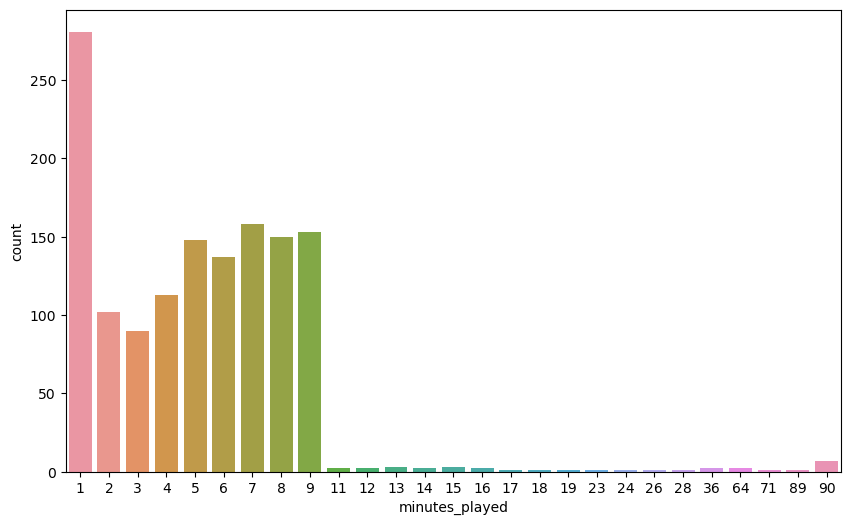

In [30]:
plt.figure(figsize=(10,6))
rating_df = train[train.rating.isna()][['minutes_played']]
null_mp_df = rating_df.groupby('minutes_played').minutes_played.agg('count').to_frame('count').reset_index()
sns.barplot(x='minutes_played', y='count', data=null_mp_df)

As we can see, most of the missing ratings are for the players who played less then 10 minutes, which is normal since it's hard to rate a player who played for less than 10 minutes, I know there's the super subs who change a game in minutes on the pitch like scoreing a last minute goal or something but I am not going to complicate things here and I'll just drop those rows.

In [31]:
train[(train.rating.isnull()) & (train.was_subbed==1)].was_subbed.agg('count')

18

Here we have 18 rows with misssing values, those was subbed players; they didn't start the game.

In [32]:
train[(train.rating.isnull()) & (train.is_a_sub==1)].was_subbed.agg('count')

1342

We have also 1342 players who were a subs. We need to get a look on the played minutes.

In [33]:
len(train[(train.rating.isnull()) & (train.minutes_played>10)])

34

So from almost 1400 players with missing rating value, only 34 played more than 10 minutes and I say before it's hard to note a player who played less than 10 minutes. Let't clean some rows then.

In [34]:
toDeleteNullRatingIndexes = train[(train.rating.isnull()) & (train.minutes_played>10) | (train.minutes_played<10)].index.values
train = train.drop(toDeleteNullRatingIndexes)

In [35]:
len(train[train.minutes_played<10])

0

In [36]:
train.isna().sum()

player_id              0
name                   0
role                   0
diving_save            0
goals_conceded         0
minutes_played         0
punches                0
saves                  0
saves_inside_box       0
throws                 0
accurate_passes        0
assists                0
chances_created        0
goals                  0
pass_success           0
total_shots            0
blocked_shots          0
shot_accuracy          0
shot_off_target        0
shot_on_target         0
accurate_long_balls    0
crosses                0
key_passes             0
long_balls             0
passes                 0
touches                0
aerials_lost           0
aerials_won            0
clearances             0
dispossessed           0
dribbles_attempted     0
dribbles_succeeded     0
duels_lost             0
duels_won              0
fouls                  0
interceptions          0
recoveries             0
tackles_attempted      0
tackles_succeeded      0
was_fouled             0


We don't have any more missing values and our dataset is clean, now we can get to machine learning phase.
We'll use MinMaxScaler to change the range of the minutes_played feature to values between 0 and 1, generally that helps the model to give better predictions later.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train['minutes_played'] = scaler.fit_transform(train[['minutes_played']])

In [38]:
train['minutes_played'].head()

0    0.372727
2    0.054545
3    0.263636
4    0.727273
5    0.727273
Name: minutes_played, dtype: float64

As I said at the start of this project, we need to split the data for plyers and keepers since each has it's own features, this step will be really impactful later for the model when it comes to predictions.

In [39]:
player_train = train.drop(train[train.role == 'Keeper'].index.values)
keeper_train = train[train.role == 'Keeper']
player_train = player_train.reset_index()
keeper_train = keeper_train.reset_index()
player_train = player_train.drop(['index'], axis=1)
keeper_train = keeper_train.drop(['index'], axis=1)
player_train = player_train.drop(['diving_save', 'goals_conceded', 'punches', 'saves', 'saves_inside_box', 'throws'], axis=1)
keeper_train = keeper_train.drop(['assists', 'chances_created', 'goals', 'crosses', 'blocked_shots'], axis=1)

Another thing we can do is to drop the player_is which we could have done earlier but it doesn't matter that won't change anything, and the player names column also, which was helpful to fill the roles of the 6 missing rows but now we can drop it. And for the keeper we can also drop the role column since all keepers are just keepers, but the players can be defenders, midfielders or attacker.

In [40]:
player_train.columns

Index(['player_id', 'name', 'role', 'minutes_played', 'accurate_passes',
       'assists', 'chances_created', 'goals', 'pass_success', 'total_shots',
       'blocked_shots', 'shot_accuracy', 'shot_off_target', 'shot_on_target',
       'accurate_long_balls', 'crosses', 'key_passes', 'long_balls', 'passes',
       'touches', 'aerials_lost', 'aerials_won', 'clearances', 'dispossessed',
       'dribbles_attempted', 'dribbles_succeeded', 'duels_lost', 'duels_won',
       'fouls', 'interceptions', 'recoveries', 'tackles_attempted',
       'tackles_succeeded', 'was_fouled', 'is_a_sub', 'was_subbed',
       'yellow_card', 'red_card', 'rating'],
      dtype='object')

In [41]:
player_train = player_train.drop(['player_id', 'name'], axis=1)
keeper_train = keeper_train.drop(['player_id', 'name', 'role'], axis=1)
player_train = pd.get_dummies(data=player_train, columns=['role'])

In [42]:
player_train.shape

(19576, 39)

In [43]:
player_train.head()

,minutes_played,accurate_passes,assists,chances_created,goals,pass_success,total_shots,blocked_shots,shot_accuracy,shot_off_target,...,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating,role_Attacker,role_Defender,role_Midfielder
0,0.054545,9,0,0,0,0.82,0,0,0.0,0,...,0,0,1,0,0,0,6.1,1,0,0
1,0.727273,24,1,2,0,0.60,2,0,0.5,1,...,1,0,0,0,0,0,7.7,0,1,0
2,0.727273,45,0,0,0,0.83,0,0,0.0,0,...,1,0,0,0,0,0,7.0,0,1,0
3,0.727273,50,0,0,1,0.88,1,0,1.0,0,...,1,0,0,0,0,0,8.4,0,1,0
4,0.727273,64,0,0,0,0.91,2,0,0.0,2,...,0,0,0,0,0,0,7.0,0,1,0


In [44]:
player_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19576 entries, 0 to 19575
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   minutes_played       19576 non-null  float64
 1   accurate_passes      19576 non-null  int64  
 2   assists              19576 non-null  int32  
 3   chances_created      19576 non-null  int32  
 4   goals                19576 non-null  int32  
 5   pass_success         19576 non-null  float64
 6   total_shots          19576 non-null  int64  
 7   blocked_shots        19576 non-null  int64  
 8   shot_accuracy        19576 non-null  float64
 9   shot_off_target      19576 non-null  int64  
 10  shot_on_target       19576 non-null  int64  
 11  accurate_long_balls  19576 non-null  int64  
 12  crosses              19576 non-null  int64  
 13  key_passes           19576 non-null  int64  
 14  long_balls           19576 non-null  int64  
 15  passes               19576 non-null 

In [45]:
player_train['shot_accuracy'].head()

0    0.0
1    0.5
2    0.0
3    1.0
4    0.0
Name: shot_accuracy, dtype: float64

In [46]:
keeper_train.shape

(1612, 37)

In [47]:
keeper_train.head()

,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,pass_success,total_shots,...,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,1,0,0.372727,0,2,0,0,14,0.0,0,...,0,1,0,0,0,1,0,0,0,6.2
1,1,0,0.263636,0,2,0,1,9,0.0,0,...,0,2,0,0,0,0,1,0,0,6.2
2,3,0,0.727273,0,4,2,6,17,0.0,0,...,0,10,0,0,0,0,0,0,0,4.5
3,2,0,0.727273,0,2,0,5,11,0.0,0,...,0,5,0,0,1,0,0,0,0,6.1
4,1,0,0.727273,0,3,2,5,13,0.0,0,...,0,11,0,0,0,0,0,0,0,7.7


The data analysis is done, now we can start building the models. We'll use the XGBoost Regression and LinearRegression algorithms to predict the players rating, and the Support Vector Regression algorithm to predict the keepers rating.

Now let's start by creating a first model for the players.
So I need first to download the library of the algorithm xgboost and then import the needed libraries

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

In [49]:
X = player_train.drop(['rating'], axis=1)
y = player_train['rating']

Now we'll just split our data to training and testing rows using the train_test_split function

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

Since we're predicting a numerical values that can be influenced by other values we can use the Linear Regression model.

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = model.predict(X_test)

In [76]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.7533321168646597
MSE: 0.1693203116161466
RMSE: 0.4114854938101058
MAE: 0.3026270422360079


'A good linear regression model will have a low MSE and a high R².'
We can say then that our model is not bad.

One last step I want to do with the players predictions is to visualize our predictions next to the true values in one dataframe.

In [78]:
data = {"y_test": y_test, "y_pred": y_pred}
df = pd.DataFrame(data)
df.head(10)

,y_test,y_pred
1562,7.2,7.419447
1311,7.7,7.397410
6359,7.2,7.112803
12859,5.8,5.765821
7938,7.2,7.284482
8914,6.6,5.876940
11275,6.8,6.749564
10930,6.7,6.304049
4272,6.2,6.380338
6914,6.5,6.535515


As we can see the model is doing well. Now let's get to the keepers part.

In [79]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=1, gamma='scale')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
print(f'Mean squared error: {mse:.2f}')

R-squared: 0.75
Mean squared error: 0.17


Here we can also see that our model gives a pretty decent results. I want to try to predict the keepers rating using the LinearRegression model also.

In [81]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
print(f'Mean squared error: {mse:.2f}')

R-squared: 0.75
Mean squared error: 0.17


They two models gave us the same results, even with the players predictions I tried a new model xgboost and the linear regression model and they gave the same result, it was great to learn how to work with those 2 now models the xgboost and the standard scaler but I personnally prefer to use the basic Linear Regression model because it's really powerful and reliable model when it comes to numeric variables.

That's the end of my project I learned a lot during this journey and I hope you find it as interesting as I did.